In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

Getting data from JSON files

In [4]:
data = pd.read_json("train.json")
test = pd.read_json("test.json")

In [5]:
data.head()

,cuisine,id,ingredients
0,italian,0,"[penne, shallots, rice vinegar, fresh basil, g..."
1,greek,1,"[sugar, chopped walnuts, filo dough, chopped a..."
2,italian,2,"[fresh rosemary, chopped fresh thyme, fresh or..."
3,southern_us,3,"[sugar, hot sauce, ramps, vinegar, cream chees..."
4,french,4,"[ground cinnamon, panettone, whipped cream, Am..."


In [6]:
test.head()


,id,ingredients
0,29774,"[eggs, beef stock, rice cakes]"
1,29775,"[pasta, orange, fresh thyme, peas, celery, tom..."
2,29776,"[olive oil, onions, red wine, top sirloin stea..."
3,29777,"[ground black pepper, patis, chicken stock, ga..."
4,29778,"[black pepper, garlic cloves, tomato paste, sa..."


Removing null values


In [7]:
data.isnull().values.any()
data.dropna(axis=0, how='any',inplace = True)
data.isnull().values.any()
data.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [8]:
data.shape


(29774, 3)

List of Cuisines

In [9]:
data.cuisine.unique()

array(['italian', 'greek', 'southern_us', 'french', 'mexican', 'moroccan',
       'russian', 'indian', 'japanese', 'vietnamese', 'spanish', 'thai',
       'british', 'cajun_creole', 'brazilian', 'korean', 'irish',
       'jamaican', 'chinese', 'filipino'], dtype=object)

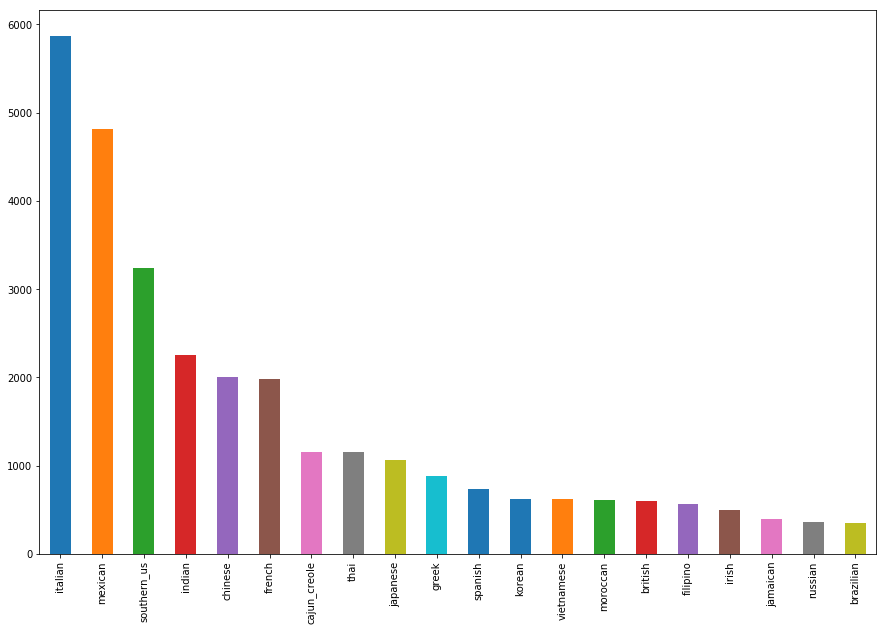

In [10]:
pd.value_counts(data['cuisine']).plot.bar() 

input

In [11]:
#Convert into proper format
data.ingredients =data.ingredients.str.join(' ')
test.ingredients =test.ingredients.str.join(' ')

In [12]:
# convert text to unique integers with HashingVectorizer
vect = HashingVectorizer()
features = vect.fit_transform(data.ingredients)
testfeatures = vect.transform(test.ingredients)

In [13]:
labels = data.cuisine


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

start = time.time()

log_reg = LogisticRegression(C=12)
log_reg.fit(X_train,y_train)

print("Time: " , time.time() - start )
print("Accuracy: ",log_reg.score(X_test, y_test))

Time:  14.529520273208618
Accuracy:  0.7872376154492023


In [16]:
from sklearn.svm import LinearSVC

start = time.time()

linear_svm = LinearSVC(random_state=0, max_iter = 1500)
linear_svm.fit(X_train, y_train)

print("Time: " , time.time() - start )
print("Accuracy: ",linear_svm.score(X_test, y_test))

Time:  1.7116858959197998
Accuracy:  0.7877413937867338


In [17]:
from sklearn.svm import SVC

start = time.time()

rbf_svm = SVC(kernel='rbf', gamma=0.8, C=12)
rbf_svm.fit(X_train, y_train)


print("Time: " , time.time() - start )
print("Accuracy: ",rbf_svm.score(X_test, y_test))

Time:  61.911031007766724
Accuracy:  0.797313182199832


In [18]:
prediction = rbf_svm.predict(testfeatures)
sub = pd.DataFrame({'id':test.id,'cuisine':prediction})
output = sub[['id','cuisine']]
output.to_csv("submission.csv",index = False)
